In [1]:
# Initial Imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [4]:
df = pd.read_csv(
    Path("Untitled spreadsheet - WEOApr2021all.csv")
)

df = df[(df["Subject Descriptor"]=="Gross domestic product, current prices") & (df["Units"]=="U.S. dollars")]
df.drop(columns=["Subject Descriptor", "Units", "Scale", "Estimates Start After"], inplace=True)
df = df.T
df.columns = df.loc["Country"]
df = df.drop("Country", axis=0)
df.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
WEO Country Code,512,914,612,614,311,213,911,314,193,122,...,111,298,927,846,299,582,487,474,754,698
ISO,AFG,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,...,USA,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
WEO Subject Code,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,...,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD
Subject Notes,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...
Country/Series-specific Notes,"See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...",...,"See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren..."


In [6]:
Ger_df = df[['Germany']]

Ger_Inflation = Ger_df.drop(labels=["WEO Country Code", "ISO", "WEO Subject Code", "Subject Notes", "Country/Series-specific Notes"], axis=0)

Ger_Inflation.rename(columns = {'Country':'Year'}, inplace = True)

#df = df.replace(",","", regex=True)
#df = df.astype("float")
#df


Ger_Inflation = Ger_Inflation.replace(",","", regex=True)
Ger_Inflation = Ger_Inflation.astype("float")
Ger_Inflation

Country,Germany
1980,853.705
1981,718.264
1982,693.547
1983,691.912
1984,651.900
1985,661.037
1986,944.124
1987,1174.860
1988,1266.620
1989,1257.390


In [10]:
def window_data(Ger_Inflation, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(Ger_Inflation) - window):
        features = Ger_Inflation.iloc[i : (i + window), feature_col_number]
        target = Ger_Inflation.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [12]:
window_size = 20

feature_column = 0
target_column = 0
X, y = window_data(Ger_Inflation, window_size, feature_column, target_column)
print (f"X sample values:\n{X} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[ 853.705  718.264  693.547  691.912  651.9    661.037  944.124 1174.86
  1266.62  1257.39  1598.64  1875.62  2136.31  2072.46  2209.93  2588.
  2498.11  2214.69  2242.07  2197.13 ]
 [ 718.264  693.547  691.912  651.9    661.037  944.124 1174.86  1266.62
  1257.39  1598.64  1875.62  2136.31  2072.46  2209.93  2588.    2498.11
  2214.69  2242.07  2197.13  1948.84 ]
 [ 693.547  691.912  651.9    661.037  944.124 1174.86  1266.62  1257.39
  1598.64  1875.62  2136.31  2072.46  2209.93  2588.    2498.11  2214.69
  2242.07  2197.13  1948.84  1945.8  ]
 [ 691.912  651.9    661.037  944.124 1174.86  1266.62  1257.39  1598.64
  1875.62  2136.31  2072.46  2209.93  2588.    2498.11  2214.69  2242.07
  2197.13  1948.84  1945.8   2077.02 ]
 [ 651.9    661.037  944.124 1174.86  1266.62  1257.39  1598.64  1875.62
  2136.31  2072.46  2209.93  2588.    2498.11  2214.69  2242.07  2197.13
  1948.84  1945.8   2077.02  2501.01 ]
 [ 661.037  944.124 1174.86  1266.62  1257.39  1598.64  1875

In [13]:
type(X)



numpy.ndarray

In [14]:
# Use 90% of the data for training and the remainder for testing
split = int(0.9 * len(X))
X_train = X[: split]
X_test = X[split - 20:]
y_train = y[: split]
y_test = y[split - 20:]

In [15]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [16]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.0861325 ]
  [0.02392289]
  [0.01346514]
  [0.01293652]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00350589]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.09432262]
  [0.06271011]
  [0.13077232]
  [0.27057203]
  [0.20823656]
  [0.09562743]
  [0.09951263]
  [0.08007838]]

 [[0.02832485]
  [0.01501291]
  [0.01293652]
  [0.        ]
  [0.00295414]
  [0.09168444]
  [0.08227243]
  [0.03565157]
  [0.        ]
  [0.12961929]
  [0.1208749 ]
  [0.12940809]
  [0.06271011]
  [0.13077232]
  [0.317957  ]
  [0.23269953]
  [0.10137917]
  [0.1053648 ]
  [0.08441796]
  [0.0009686 ]]

 [[0.01777538]
  [0.01442352]
  [0.        ]
  [0.00295414]
  [0.09448067]
  [0.16641378]
  [0.11499086]
  [0.03206543]
  [0.12961929]
  [0.23482647]
  [0.2346408 ]
  [0.09771256]
  [0.13077232]
  [0.317957  ]
  [0.27345193]
  [0.11328887]
  [0.11170221]
  [0.08938244]
  [0.00102109]
  [0.        ]]

 [[0.01707754]
  [0.        ]
  [0.00295414]
  [0.09448067]
  [0.169081

In [17]:
y_train

array([[0.00091918],
       [0.        ],
       [0.03967587],
       [0.1678741 ],
       [0.26223203],
       [0.27292353],
       [0.3171953 ],
       [0.44754936],
       [0.54396335],
       [0.44197986],
       [0.44043177],
       [0.54511535],
       [0.47881353],
       [0.5406404 ],
       [0.58788135],
       [0.42697366],
       [0.46052671],
       [0.52474828],
       [0.61070057],
       [0.57924893],
       [0.5615487 ],
       [0.71765186],
       [0.8019593 ],
       [0.85019502]])

In [18]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [19]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.4

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))


model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer


model.add(Dense(1))

In [20]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics= ["accuracy"])

In [21]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 5)             140       
_________________________________________________________________
dropout (Dropout)            (None, 20, 5)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 5)             220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 5)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [22]:
# Train the model
model.fit(X_train, y_train, epochs=200, shuffle=False, batch_size=10, verbose=1)

Epoch 1/200
3/3 [==============================] - 6s 16ms/step - loss: 0.4017 - accuracy: 0.0417
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 0.3199 - accuracy: 0.0417
Epoch 3/200
3/3 [==============================] - 0s 20ms/step - loss: 0.3165 - accuracy: 0.0417
Epoch 4/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2773 - accuracy: 0.0417
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2516 - accuracy: 0.0417
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2159 - accuracy: 0.0417
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 0.2024 - accuracy: 0.0417
Epoch 8/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1813 - accuracy: 0.0417
Epoch 9/200
3/3 [==============================] - 0s 20ms/step - loss: 0.1694 - accuracy: 0.0417
Epoch 10/200
3/3 [==============================] - 0s 21ms/step - loss: 0.1435 - accuracy: 0.0417
Epoch 11/200
3/3 [=

In [23]:

# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 2s 2s/step - loss: 0.0177 - accuracy: 0.0435


[0.01772456243634224, 0.043478261679410934]

In [24]:
predicted = model.predict(X_test)
predicted

array([[0.24845186],
       [0.27345037],
       [0.29538003],
       [0.31368136],
       [0.32966113],
       [0.3453756 ],
       [0.36577785],
       [0.38810915],
       [0.41224897],
       [0.4364199 ],
       [0.46409047],
       [0.4924363 ],
       [0.5175277 ],
       [0.54182273],
       [0.5659245 ],
       [0.588275  ],
       [0.61014885],
       [0.6318372 ],
       [0.6515252 ],
       [0.6694501 ],
       [0.6828204 ],
       [0.6942205 ],
       [0.70693016]], dtype=float32)

In [25]:

X_test

array([[[0.        ],
        [0.0032937 ],
        [0.09448067],
        [0.1690813 ],
        [0.19874877],
        [0.19314307],
        [0.23337764],
        [0.27226669],
        [0.33384611],
        [0.30959354],
        [0.26676878],
        [0.35362972],
        [0.27345193],
        [0.13312902],
        [0.14668502],
        [0.10589048],
        [0.00114617],
        [0.        ],
        [0.04407482],
        [0.17690016]],

       [[0.00389977],
        [0.10534087],
        [0.1690813 ],
        [0.19874877],
        [0.19576456],
        [0.30366499],
        [0.33213908],
        [0.37355272],
        [0.30959354],
        [0.36180969],
        [0.43175966],
        [0.30900778],
        [0.13312902],
        [0.14668502],
        [0.12443496],
        [0.00128081],
        [0.        ],
        [0.04666679],
        [0.18648668],
        [0.27633143]],

       [[0.12472428],
        [0.18851655],
        [0.19874877],
        [0.19576456],
        [0.30609612],
      

In [41]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [42]:
predicted_prices.ravel().shape

(23,)

In [47]:
# Create a DataFrame of Real and Predicted values
Inflation = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
Inflation

,Real,Predicted
2004,2813.08,2767.504883
2005,2848.44,2850.182617
2006,2994.86,2922.710449
2007,3425.98,2983.238525
2008,3744.85,3036.088379
2009,3407.56,3088.060791
2010,3402.44,3155.537109
2011,3748.66,3229.393555
2012,3529.38,3309.231201
2013,3733.86,3389.171387


<AxesSubplot:>

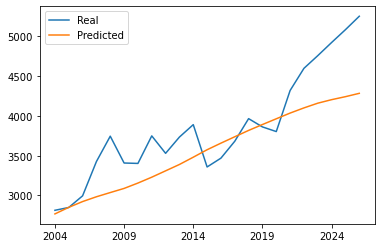

In [48]:

# Plot the real vs predicted prices as a line chart
Inflation.plot()

In [49]:
from sklearn.metrics import r2_score

In [50]:
y_true = Inflation["Real"]
y_pred = Inflation["Predicted"]
r2_score(y_true, y_pred)

0.5629768230719612